# Data Exploration

---

## Import packages

In [76]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc("figure", figsize=(10,5))

import seaborn as sns

import pathlib

---

## Setup Folders
As always we start with specifying the data paths:

In [77]:
proj_dir = pathlib.Path(pathlib.Path.home(), 'switchdrive', 'Biozentrum', 'Andreas')
processed_dir = proj_dir / 'processed'


---

## Load Data
We load the data from the last notebook;

In [78]:
#load data frame
df_name = processed_dir / 'caulobacter_combined_filtered_paired_data.csv'
df = pd.read_csv(df_name, index_col=0)
df.head()

,uni_par_id,strain,movie_name,replicate,id_colony,id_par,frames,generation,age,cdg_d1,cdg_d2,cdg_norm_d1,cdg_norm_d2,len_d1,len_d2,idc_d1,idc_d2,rel_cdg
0,AKS1088-0-99,AKS1088,AKS1088_TL01_01,0,30,99,4,1.0,0,498.574545,508.944186,1.000000,1.020799,38.155479,30.224384,247,100,0.979625
1,AKS1088-0-99,AKS1088,AKS1088_TL01_01,0,30,99,5,1.0,1,493.422535,495.450893,0.989667,0.993735,39.082878,31.386862,247,100,0.995906
2,AKS1088-0-99,AKS1088,AKS1088_TL01_01,0,30,99,6,1.0,2,500.161512,512.426778,1.003183,1.027784,39.650173,32.200001,247,100,0.976064
3,AKS1088-0-99,AKS1088,AKS1088_TL01_01,0,30,99,7,1.0,3,479.476974,515.524000,0.961696,1.033996,40.208679,33.384285,247,100,0.930077
4,AKS1088-0-99,AKS1088,AKS1088_TL01_01,0,30,99,8,1.0,4,490.732484,511.780303,0.984271,1.026487,41.959156,35.382584,247,100,0.958873


## Compare Siblings and Normalize Fluorescence

We compare fluorescence between siblings, and assign cdg high (1) and low (0) cell types based on the difference in fluorescence in the last 3 (`av_wndw`) frames for which both cells are present. 

Fluorescent intensity is normalized with intensity of cdg high type in first frame



<AxesSubplot:ylabel='Frequency'>

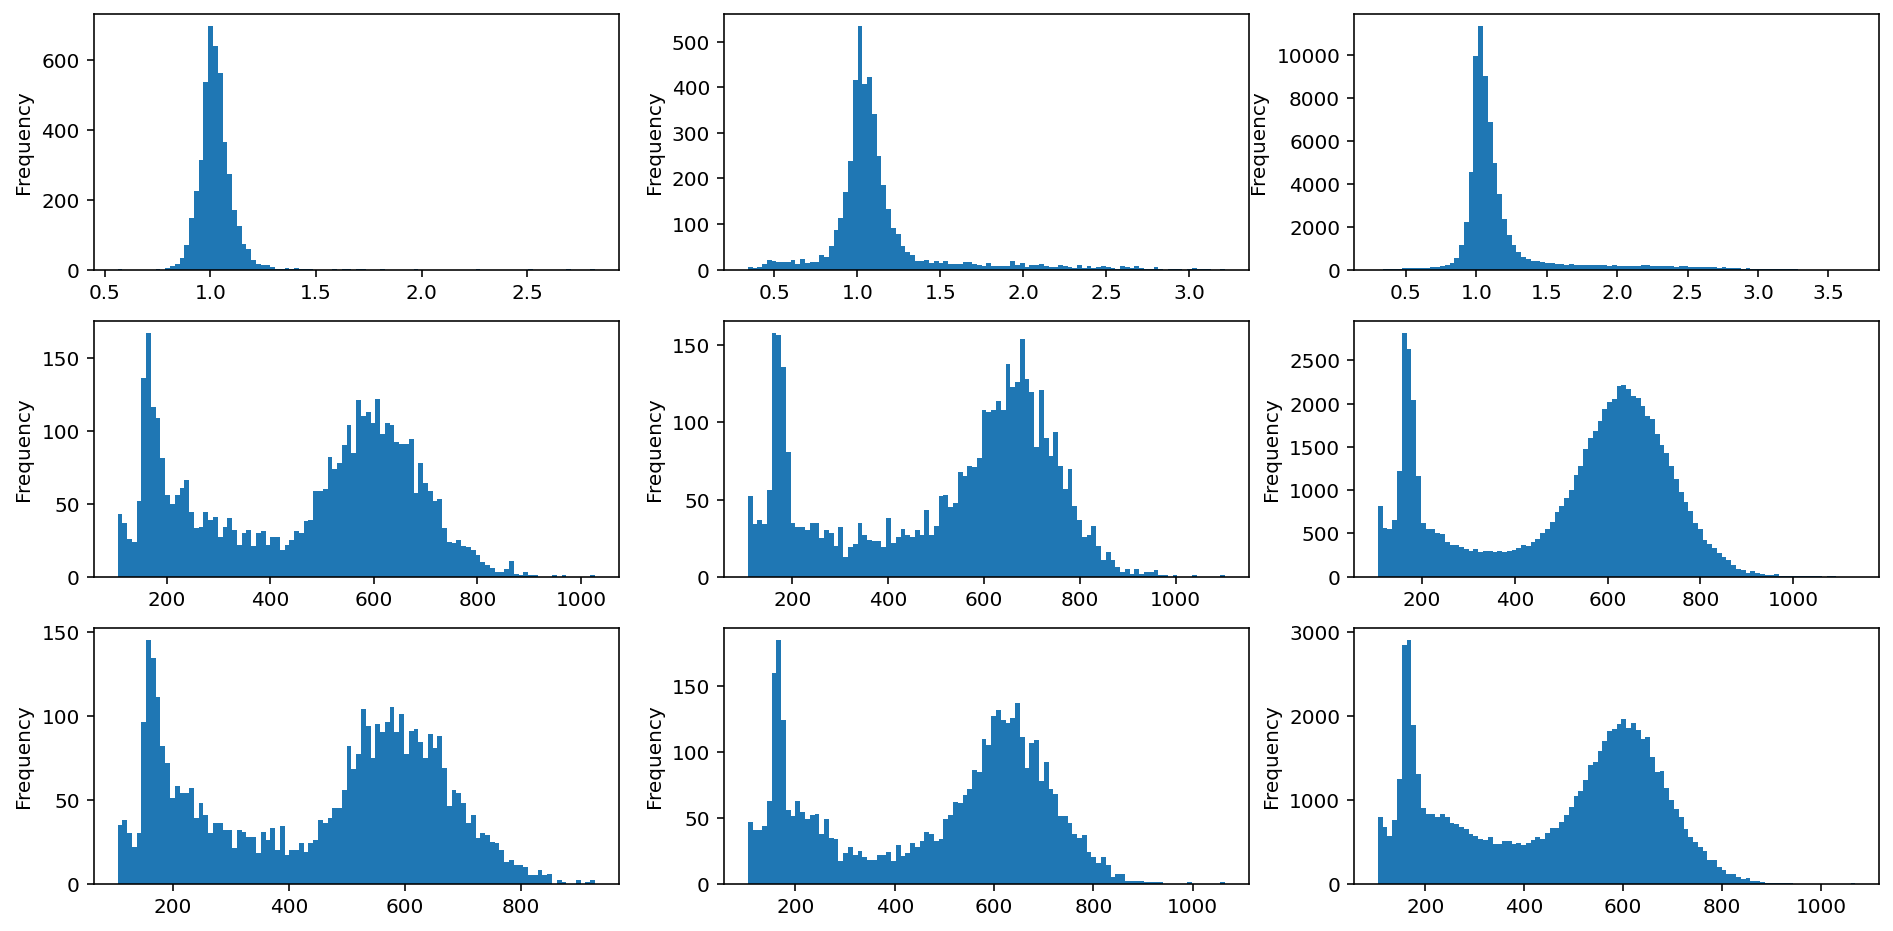

In [79]:

fig, axs = plt.subplots(3,3, figsize=(16,8))
df.groupby('uni_par_id').first()['rel_cdg'].plot(ax=axs[0][0], kind='hist', bins=100)
df.groupby('uni_par_id').last()['rel_cdg'].plot(ax=axs[0][1], kind='hist', bins=100)
df['rel_cdg'].plot(ax=axs[0][2], kind='hist', bins=100)

df.groupby('uni_par_id').first()['cdg_d1'].plot(ax=axs[1][0], kind='hist', bins=100)
df.groupby('uni_par_id').last()['cdg_d1'].plot(ax=axs[1,1], kind='hist', bins=100)
df['cdg_d1'].plot(ax=axs[1,2], kind='hist', bins=100)

df.groupby('uni_par_id').first()['cdg_d2'].plot(ax=axs[2,0], kind='hist', bins=100)
df.groupby('uni_par_id').last()['cdg_d2'].plot(ax=axs[2,1], kind='hist', bins=100)
df['cdg_d2'].plot(ax=axs[2,2], kind='hist', bins=100)

/Users/simonvanvliet/opt/miniconda3/envs/i2i_env/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


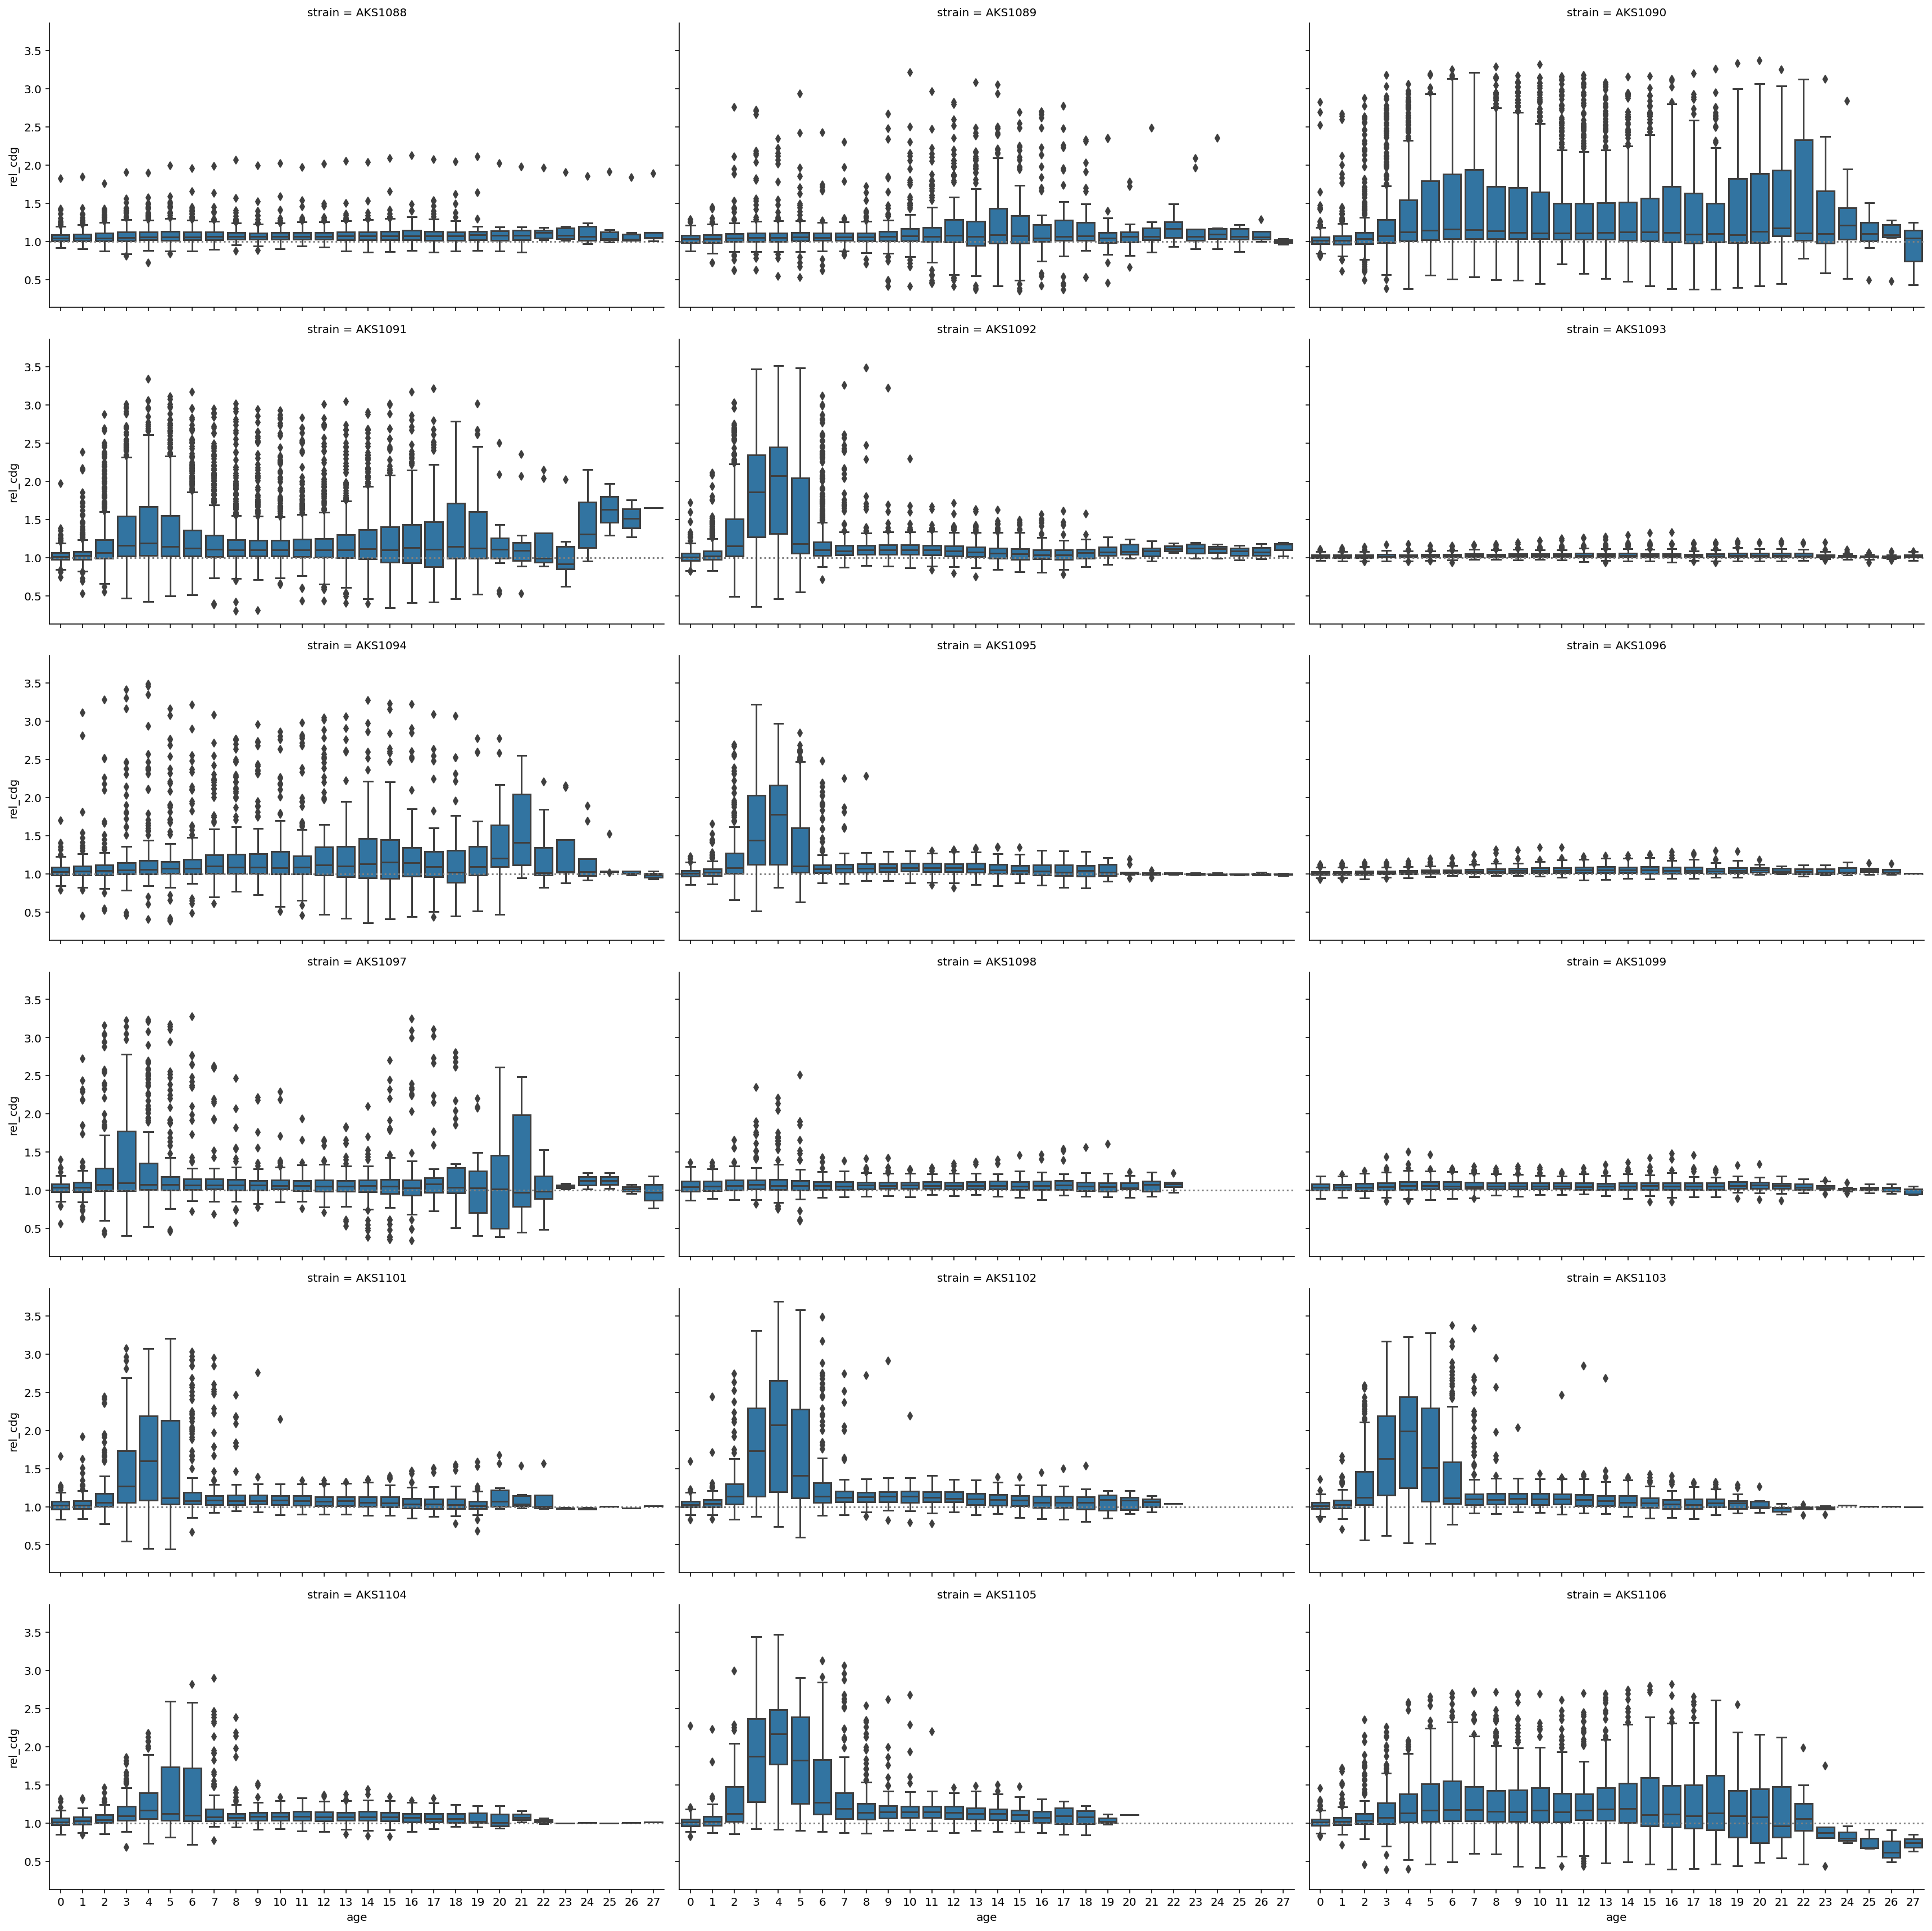

In [80]:
# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(data=df, col="strain", col_wrap=3, height=4, aspect=2)
# Draw a horizontal line to show the starting point
grid.refline(y=1, linestyle=":")
# Draw a line plot to show the trajectory of each random walk
grid.map(sns.boxplot, "age", "rel_cdg")
# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)

In [81]:
df.head()

,uni_par_id,strain,movie_name,replicate,id_colony,id_par,frames,generation,age,cdg_d1,cdg_d2,cdg_norm_d1,cdg_norm_d2,len_d1,len_d2,idc_d1,idc_d2,rel_cdg
0,AKS1088-0-99,AKS1088,AKS1088_TL01_01,0,30,99,4,1.0,0,498.574545,508.944186,1.000000,1.020799,38.155479,30.224384,247,100,0.979625
1,AKS1088-0-99,AKS1088,AKS1088_TL01_01,0,30,99,5,1.0,1,493.422535,495.450893,0.989667,0.993735,39.082878,31.386862,247,100,0.995906
2,AKS1088-0-99,AKS1088,AKS1088_TL01_01,0,30,99,6,1.0,2,500.161512,512.426778,1.003183,1.027784,39.650173,32.200001,247,100,0.976064
3,AKS1088-0-99,AKS1088,AKS1088_TL01_01,0,30,99,7,1.0,3,479.476974,515.524000,0.961696,1.033996,40.208679,33.384285,247,100,0.930077
4,AKS1088-0-99,AKS1088,AKS1088_TL01_01,0,30,99,8,1.0,4,490.732484,511.780303,0.984271,1.026487,41.959156,35.382584,247,100,0.958873


In [82]:
nstr = len(df['strain'].unique())
nfrm = df['age'].max()+1
npair = df.groupby('uni_par_id').first().groupby('strain').size().max()
cdg_mat = np.full((nstr,4,npair,nfrm), np.nan)

strains_grouped = df.groupby('strain')
for i, (name, strain) in enumerate(strains_grouped):
    cells_grouped = strain.groupby('uni_par_id')
    for j, (name, cell) in enumerate(cells_grouped):
        nfr = cell.shape[0]
        cdg_mat[i,0,j,:nfr] = cell['cdg_d1'].values
        cdg_mat[i,1,j,:nfr] = cell['cdg_d2'].values
        
        cdg_mat[i,2,j,:nfr] = cell['cdg_norm_d1'].values
        cdg_mat[i,3,j,:nfr] = cell['cdg_norm_d2'].values        


In [111]:
df1 = df[['strain','age','cdg_d1']].copy()
df1['type'] = 'cdg high'
df1['cdg'] = df1['cdg_d1']


df2 = df[['strain','age','cdg_d2']].copy()
df2['type'] = 'cdg low'
df2['cdg'] = df2['cdg_d2']

dfc = pd.concat((df1, df2),keys=['strain','age','cdg','type']).reset_index()


ValueError: Could not interpret value `variable` for parameter `x`

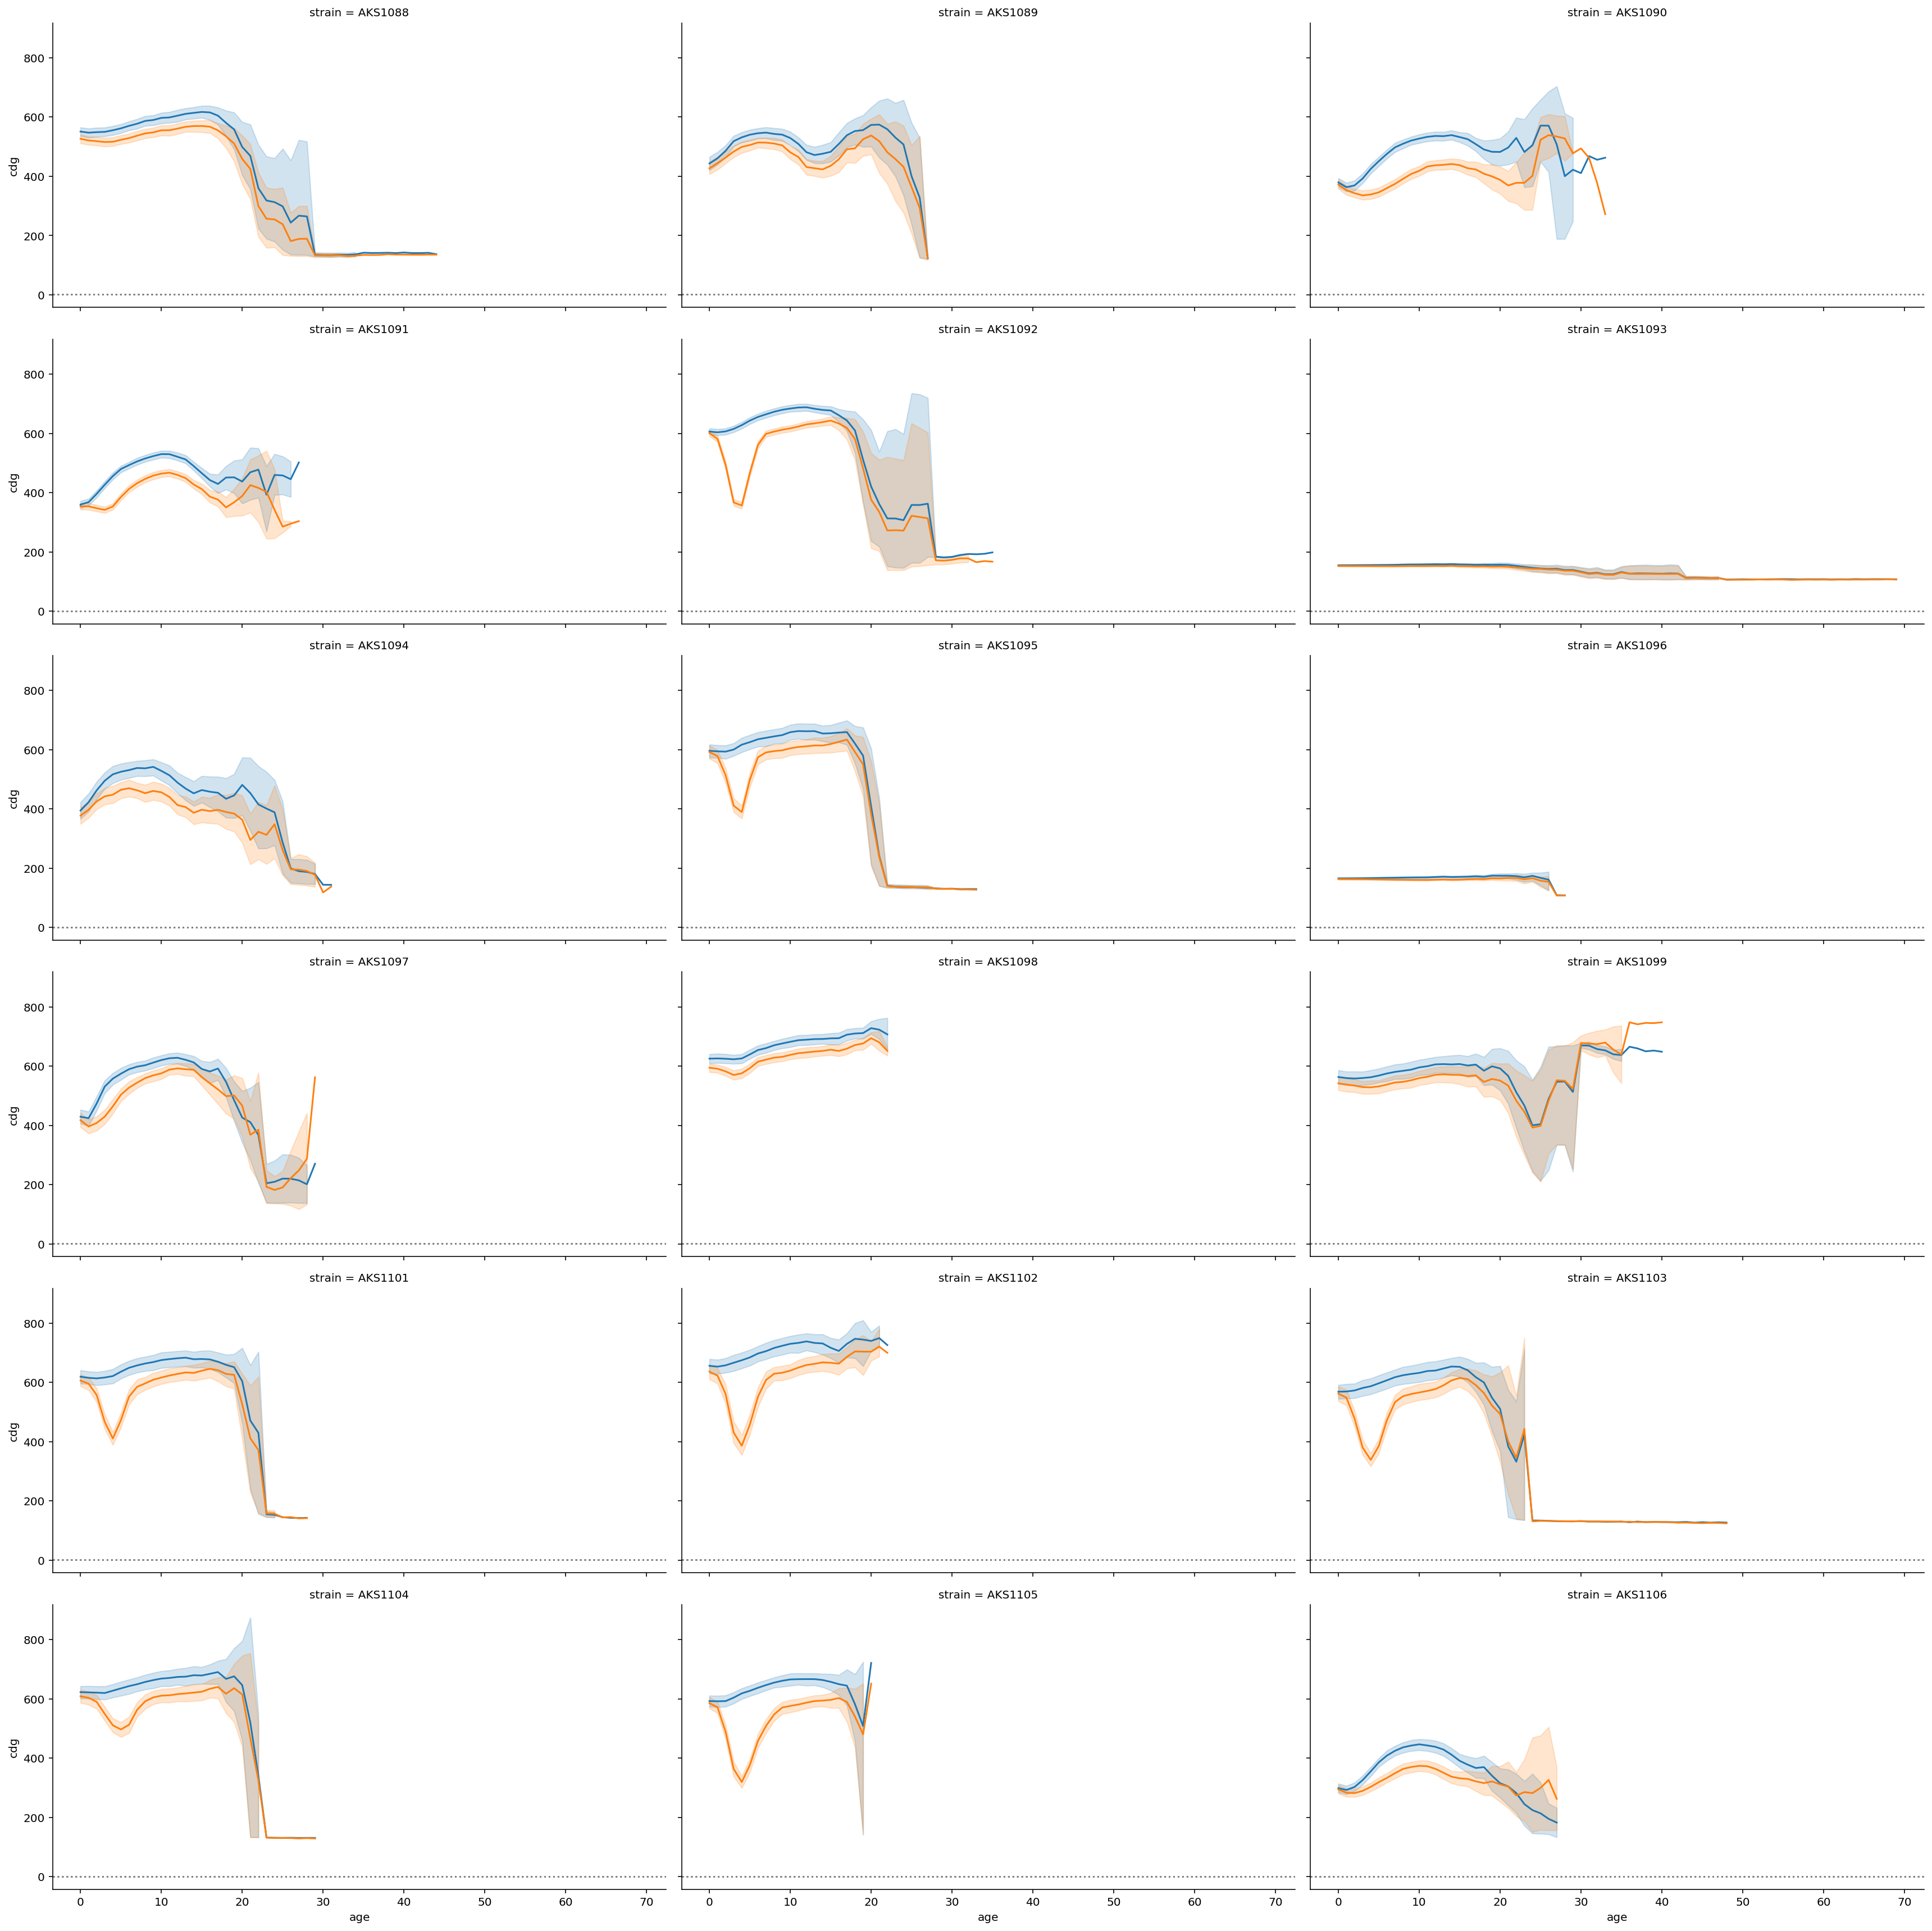

In [112]:
# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(data=dfc, col="strain", hue='type', col_wrap=3, height=4, aspect=2)
# Draw a horizontal line to show the starting point
grid.refline(y=1, linestyle=":")
# Draw a line plot to show the trajectory of each random walk
grid.map(sns.lineplot, "age", "cdg")
# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)